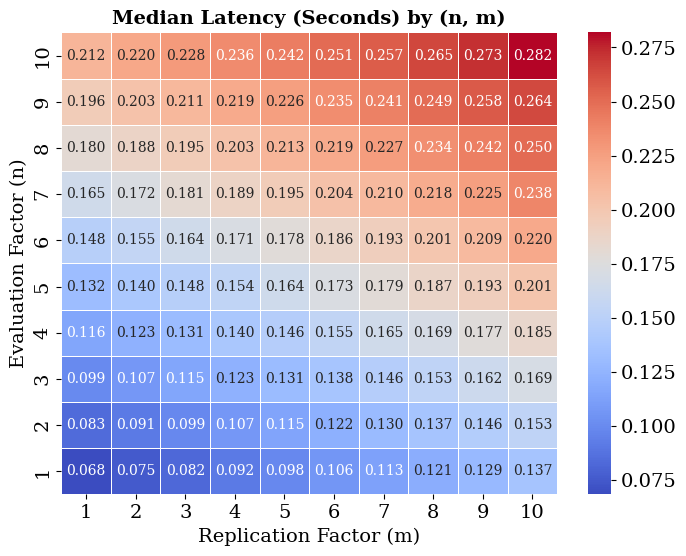

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

heatmapFsDefault = 10
defaultFs = 14

# Set global font settings to a serif font like Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = defaultFs  # Adjust to match academic text size

# Load the CSV file
file_path = "../experiment-1.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert latency from milliseconds to seconds
df['lat_med'] = df['lat_med'] / 1000

# Group data by (n_ev, n_ms) and compute median latency
grouped = df.groupby(['n_ev', 'n_ms']).agg({'lat_med': 'median'}).reset_index()

# Pivot table for heatmap visualization
latency_pivot_seconds = grouped.pivot(index='n_ev', columns='n_ms', values='lat_med')

# Create and save the latency heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(latency_pivot_seconds.sort_index(ascending=False), 
            annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5,
            annot_kws={"fontsize": heatmapFsDefault})
plt.title('Median Latency (Seconds) by (n, m)', fontsize=14, fontweight='bold')
plt.xlabel('Replication Factor (m)', fontsize=defaultFs)
plt.ylabel('Evaluation Factor (n)', fontsize=defaultFs)
plt.savefig("../charts/latency_heatmap.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()
